# 1. Import Libraries

In order to run this code, you will need to install the following libraries:

In [39]:
# imports for data management
import pandas as pd # Needed to utilize the pandas methods
import numpy as np # Needed to utilize the numpy methods
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
plt.style.use('default') 

# API imports
import yfinance as yf # Needed to utilize yfinance

# 2. Using Yahoo Finance API for Crypto Asset Data

We will be using the Yahoo Finance API to pull in the data for the cryptocurrency being analyzed. In this case, Bitcoin.

We can use the API to create a dataframe with the following information:

    - Date
    - Open
    - High
    - Low
    - Close
    - Volume

In [40]:
class YahooStockAnalysis():
    # class attributes
    period = '1wk'    # default period
    interval = '1h'  # default interval

    # class initialization
    def __init__(self, ticker):
        self.ticker = ticker  # ticker symbol
        self.yf_object = yf.Ticker(self.ticker)  # yfinance object
        print('You have created a stock analysis object for ' + self.get_name())
        self.history = self.yf_object.history(period=self.period, interval=self.interval)
        self.history.drop(columns={'Dividends', 'Stock Splits'}, inplace=True)
        print('For help on how to use this object use the \'help()\' method. ie. object.help()')


    def help(self):
        print('\n')
        print('The following methods are available for this object:')
        print('get_current_price()')
        print('get_history()')
        print('get_name()')
        print('get_ticker()')
        print('get_description()')
        print('get_period()')
        print('set_period(new_period)')
        print('get_interval()')
        print('set_interval(new_interval)')
        print('get_high()')
        print('calc_low()')
        print('calc_close()')
        print('calc_open()')
        print('calc_volume()')
        print('drop_nan()')
        print('\n')
        
    def get_current_price(self):  # returns the current price
        return self.yf_object.info['regularMarketPrice']
    
    def get_history(self):  # returns a dataframe of historical data
        return self.history 

    def get_name(self):  # returns the name of the stock
        return self.yf_object.info['name']

    def get_ticker(self):  # returns the ticker symbol
        return self.yf_object.info['symbol']

    def get_description(self):  # returns the description of the stock
        return self.yf_object.info['description']

    def get_period(self):  # returns the period
        return self.period

    def set_period(self, new_period):  # sets the period
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        self.period = new_period
        self.history = self.yf_object.history(period=self.period, interval=self.interval)
        self.history.drop(columns={'Dividends', 'Stock Splits'}, inplace=True)

    def get_interval(self):  # returns the interval
        return self.interval

    def set_interval(self, new_interval):  # sets the interval
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        self.interval = new_interval
        self.history = self.yf_object.history(period=self.period, interval=self.interval)
        self.history.drop(columns={'Dividends', 'Stock Splits'}, inplace=True)

    def get_high(self): # returns the most recent high
        return round(self.history['High'][-1], 2)

    def get_low(self): # returns the most recent low
        return round(self.history['Low'][-1], 2)

    def get_close(self):  # returns the most recent close
        return round(self.history['Close'][-1], 2)

    def get_open(self): # returns the most recent open
        return round(self.history['Open'][-1], 2)
    
    def get_volume(self): # returns the most recent volume
        return round(self.history['Volume'][-1], 2)

    def drop_nan(self): # drops any rows with NaN values
        self.history.dropna(inplace=True)

In [41]:
# collect the last 7 days of hourly price data for the following ticker
# default period is 1wk and default interval is 1h
price_object = YahooStockAnalysis('BTC-USD')
price_object.set_period('7d')
price_object.set_interval('1h')
price_object.drop_nan()
price_df = price_object.get_history()
price_df.head(20)


You have created a stock analysis object for Bitcoin
For help on how to use this object use the 'help()' method. ie. object.help()


,Open,High,Low,Close,Volume
2022-12-06 00:00:00+00:00,16975.238281,17038.093750,16975.238281,17033.400391,0
2022-12-06 01:00:00+00:00,17035.900391,17088.021484,17035.900391,17044.378906,0
2022-12-06 02:00:00+00:00,17042.833984,17074.789062,17042.429688,17044.587891,0
2022-12-06 03:00:00+00:00,17044.968750,17060.175781,17019.279297,17019.279297,0
2022-12-06 04:00:00+00:00,17018.478516,17019.814453,16991.808594,17018.777344,0
2022-12-06 05:00:00+00:00,17017.193359,17017.193359,16988.519531,16993.035156,0
2022-12-06 06:00:00+00:00,16992.972656,17018.216797,16985.697266,17006.345703,0
2022-12-06 07:00:00+00:00,17006.542969,17019.736328,17002.101562,17009.107422,0
2022-12-06 08:00:00+00:00,17008.007812,17036.265625,16995.429688,17036.265625,0
2022-12-06 09:00:00+00:00,17036.982422,17037.898438,16996.775391,16998.160156,0


## Function to print CSV

In [42]:
def print_csv(df, filename):
    df.to_csv(filename)

## Read in a csv of historical price data

In [43]:
df_historical_train = pd.read_csv('./BTC-USD_091317-103122.csv')
df_historical_train['Date'] = pd.to_datetime(df_historical_train.Date, infer_datetime_format=True)
df_historical_train.set_index('Date', inplace=True)
df_historical_train.drop(columns={'Adj Close'}, inplace=True)
df_historical_train['PriceDelta'] = df_historical_train['Close'].diff(1)
df_historical_train['VolumeDelta'] = df_historical_train['Volume'].diff(1)
# calculate the exponential moving averages
df_historical_train['EMA3'] = df_historical_train['Close'].ewm(span=3, adjust=False).mean()
df_historical_train['EMA7'] = df_historical_train['Close'].ewm(span=7, adjust=False).mean()
df_historical_train['EMA14'] = df_historical_train['Close'].ewm(span=14, adjust=False).mean() # used in RSI
df_historical_train['EMA20'] = df_historical_train['Close'].ewm(span=20, adjust=False).mean()
df_historical_train['EMA50'] = df_historical_train['Close'].ewm(span=50, adjust=False).mean()
df_historical_train.head()

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,EMA20,EMA50
Date,,,,,,,,,,,,
2017-10-18,5603.819824,5603.819824,5151.439941,5590.689941,2.399270e+09,NaN,NaN,5590.689941,5590.689941,5590.689941,5590.689941,5590.689941
2017-10-19,5583.740234,5744.350098,5531.060059,5708.520020,1.780540e+09,117.830079,-618729856.0,5649.604981,5620.147461,5606.400618,5601.911853,5595.310728
2017-10-20,5708.109863,6060.109863,5627.229980,6011.450195,2.354430e+09,302.930175,573889920.0,5830.527588,5717.973144,5660.407228,5640.915505,5611.629923
2017-10-21,5996.790039,6194.879883,5965.069824,6031.600098,2.207100e+09,20.149903,-147330048.0,5931.063843,5796.379883,5709.899611,5678.123561,5628.099342
2017-10-22,6036.660156,6076.259766,5792.339844,6008.419922,2.034630e+09,-23.180176,-172469888.0,5969.741882,5849.389893,5749.702319,5709.580358,5643.013874


## Add Stable Coin data to dataframe

Since the volume of USDT and other stable coins is closely tied to the cryptocurrency market we will be adding that information to the inputs

In [44]:
df_historical_USDT = pd.read_csv('./USDT-USD_110117-103122.csv')
df_historical_USDT.head(20)
df_historical_USDT['Date'] = pd.to_datetime(df_historical_USDT.Date, infer_datetime_format=True)
df_historical_USDT.set_index('Date', inplace=True)
# rename the columns
df_historical_USDT.rename(columns={'Volume': 'Volume_USDT'}, inplace=True)
df_historical_USDT['VolumeDelta_USDT'] = df_historical_USDT['Volume_USDT'].diff(1)
df_historical_USDT['Volatility_USDT'] = df_historical_USDT['High'] - df_historical_USDT['Low']
df_historical_USDT.drop(columns={'Adj Close', 'Open', 'Low', 'High', 'Close'}, inplace=True)
df_historical_USDT.head(20)

,Volume_USDT,VolumeDelta_USDT,Volatility_USDT
Date,,,
2017-11-09,358188000,NaN,0.016755
2017-11-10,756446016,398258016.0,0.028744
2017-11-11,746227968,-10218048.0,0.030411
2017-11-12,1466060032,719832064.0,0.138309
2017-11-13,767884032,-698176000.0,0.054187
2017-11-14,429857984,-338026048.0,0.016532
2017-11-15,449671008,19813024.0,0.011380
2017-11-16,650278976,200607968.0,0.017658
2017-11-17,639398016,-10880960.0,0.016052


In [45]:
# combine the two dataframes
df_historical_train = pd.concat([df_historical_train, df_historical_USDT], axis=1, join='inner')
df_historical_train.head(20)

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,EMA20,EMA50,Volume_USDT,VolumeDelta_USDT,Volatility_USDT
Date,,,,,,,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,3.226250e+09,-316.109863,-1.375950e+09,7224.877456,7136.089163,6857.305150,6661.487528,6175.867572,358188000,NaN,0.016755
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,5.208250e+09,-525.439941,1.982000e+09,6921.508796,7006.601906,6825.416481,6657.359205,6193.211594,756446016,398258016.0,0.028744
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,4.908680e+09,-260.540039,-2.995697e+08,6639.554447,6844.351454,6763.040964,6628.810719,6199.658202,746227968,-10218048.0,0.030411
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,8.957350e+09,-407.530274,4.048670e+09,6294.812136,6620.781047,6654.644812,6564.168729,6189.870423,1466060032,719832064.0,0.138309
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6.263250e+09,609.420410,-2.694100e+09,6427.151185,6605.458343,6641.957535,6563.723158,6204.365317,767884032,-698176000.0,0.054187
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,3.197110e+09,76.259766,-3.066140e+09,6531.450592,6613.031258,6641.129863,6570.582857,6221.282364,429857984,-338026048.0,0.016532
2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,4.200880e+09,679.790039,1.003770e+09,6923.495316,6788.658453,6731.051220,6641.531160,6264.194429,449671008,19813024.0,0.011380
2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,5.123810e+09,556.149902,9.229297e+08,7397.592628,7059.416325,6883.136383,6758.689139,6327.233469,650278976,200607968.0,0.017658
2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,4.651670e+09,-162.699707,-4.721398e+08,7553.291431,7221.809802,6993.250230,6849.194006,6381.420009,639398016,-10880960.0,0.016052


## Add Price Deltas and Target Columns
We will add data showing the deltas of the price, volume, and the past price, as well as target next day, next 3 day, and next week price values

In [46]:
df_historical_train['Yesterday_Price'] = df_historical_train['Close'].shift(1)
df_historical_train['3day_Past_Mean_Price'] = df_historical_train['Close'].rolling(window=3).mean()
df_historical_train['7day_Past_Mean_Price'] = df_historical_train['Close'].rolling(window=7).mean()
df_historical_train['Yesterday_Volume'] = df_historical_train['Volume'].shift(1)
df_historical_train['3day_Past_Mean_Volume'] = df_historical_train['Volume'].rolling(window=3).mean()
df_historical_train['7day_Past_Mean_Volume'] = df_historical_train['Volume'].rolling(window=7).mean()
df_historical_train['Yesterday_Vol_USDT'] = df_historical_train['Volume_USDT'].shift(1)
df_historical_train['3day_Past_Mean_Vol_USDT'] = df_historical_train['Volume_USDT'].rolling(window=3).mean()
df_historical_train['7day_Past_Mean_Vol_USDT'] = df_historical_train['Volume_USDT'].rolling(window=7).mean()


## Add column that shows if 20 day moving average crosses close price
- Buy or Sell flag (1 = Buy, 0 = Do Nothing, -1 = Sell)

When the price timeseries  crosses the EMA timeseries  from below, we will close any existing short position and go long (buy) one unit of the asset.
When the price timeseries  crosses the EMA timeseries  from above, we will close any existing long position and go short (sell) one unit of the asset.

In [47]:
df_historical_train = df_historical_train.iloc[14:]
df_historical_train.head(20)

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,...,Volatility_USDT,Yesterday_Price,3day_Past_Mean_Price,7day_Past_Mean_Price,Yesterday_Volume,3day_Past_Mean_Volume,7day_Past_Mean_Volume,Yesterday_Vol_USDT,3day_Past_Mean_Vol_USDT,7day_Past_Mean_Vol_USDT
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-23,8232.379883,8267.400391,8038.770020,8038.770020,4.225180e+09,-214.779785,5.916498e+08,8095.101501,7940.350906,7621.470656,...,0.014101,8253.549805,8121.193197,8014.264230,3.633530e+09,4.045440e+09,3.870421e+09,4.998120e+08,6.194480e+08,5.744609e+08
2017-11-24,8074.020020,8374.160156,7940.930176,8253.690430,5.058610e+09,214.920410,8.334303e+08,8174.395965,8018.685787,7705.766626,...,0.019126,8038.770020,8182.003418,8092.078544,4.225180e+09,4.305773e+09,3.928556e+09,7.358830e+08,6.947743e+08,6.043509e+08
2017-11-25,8241.709961,8790.919922,8191.149902,8790.919922,4.342060e+09,537.229492,-7.165501e+08,8482.657944,8211.744321,7850.453732,...,0.013994,8253.690430,8361.126791,8235.045689,5.058610e+09,4.541950e+09,4.024966e+09,8.486280e+08,7.454996e+08,6.134726e+08
2017-11-26,8789.040039,9522.929688,8775.589844,9330.549805,5.475580e+09,539.629883,1.133520e+09,8906.603874,8491.445692,8047.799875,...,0.016860,8790.919922,8791.720052,8419.911342,4.342060e+09,4.958750e+09,4.357289e+09,6.519880e+08,7.123560e+08,6.350010e+08
2017-11-27,9352.719727,9818.349609,9352.719727,9818.349609,5.653320e+09,487.799804,1.777403e+08,9362.476742,8823.171671,8283.873173,...,0.022044,9330.549805,9313.273112,8651.012765,5.475580e+09,5.156987e+09,4.666556e+09,6.364520e+08,6.909590e+08,6.828356e+08
2017-11-28,9823.429688,10125.700200,9736.299805,10058.799810,6.348820e+09,240.450201,6.954998e+08,9710.638276,9132.078706,8520.530058,...,0.010432,9818.349609,9735.899741,8934.947057,5.653320e+09,5.825907e+09,4.962443e+09,7.844370e+08,7.385510e+08,7.074234e+08
2017-11-29,10077.400390,11517.400390,9601.030273,9888.610352,1.156880e+10,-170.189458,5.219980e+09,9799.624314,9321.211617,8702.940764,...,0.092832,10058.799810,9921.919924,9168.527135,6.348820e+09,7.856980e+09,6.096053e+09,7.947640e+08,1.083774e+09,8.748960e+08
2017-11-30,9906.790039,10801.000000,9202.049805,10233.599610,8.310690e+09,344.989258,-3.258110e+09,10016.611962,9549.308616,8907.028610,...,0.039351,9888.610352,10060.336591,9482.074220,1.156880e+10,8.742770e+09,6.679697e+09,1.672120e+09,1.170285e+09,9.189084e+08
2017-12-01,10198.599610,11046.700200,9694.650391,10975.599610,6.783120e+09,742.000000,-1.527570e+09,10496.105786,9905.881364,9182.838077,...,0.026167,10233.599610,10365.936524,9870.918388,8.310690e+09,8.887536e+09,6.926056e+09,1.043970e+09,1.155162e+09,9.047324e+08


In [48]:

# source for strategy: https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

def add_buy_sell_signals(df, ema='EMA20'):
    has_bought = False
    has_sold = True
    # add buy and sell triggers
    df['EMA_BuySellFlag'] = 0
    # When the price timeseries  crosses the EMA timeseries  from below, we will close any existing short position and go long (buy) one unit of the asset.
    # When the price timeseries  crosses the EMA timeseries  from above, we will close any existing long position and go short (sell) one unit of the asset.
    for i in range(len(df)):  # for each row in the dataframe
        if df['Close'][i] > df[ema][i] and has_sold:  # if the price is above the EMA and we have sold
            df['EMA_BuySellFlag'][i] = 1  # buy
            has_bought = True
            has_sold = False
        elif df['Close'][i] < df[ema][i] and has_bought:  # if the price is below the EMA and we have bought
            df['EMA_BuySellFlag'][i] = -1  # sell
            has_bought = False
            has_sold = True
    return df

## Add Relative Strength Index based Buy Sell flag to dataframe
RSI shows you if the stock is overbought or oversold. 
Overbought means that buyers have saturated their need, and the stock will probably sell off; oversold means the opposite. 

In [49]:
def rsi(df, low =30, high = 70, period = 14, prevent_loss = False, return_RSI_col = False):

    has_bought = False
    has_sold = True
    last_buy_price = 0

    up = df.PriceDelta.copy()
    down = df.PriceDelta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    AVG_Gain = up.ewm(com = period - 1, min_periods = period).mean()
    AVG_Loss = abs(down.ewm(com = period - 1, min_periods = period).mean())
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    df['RSI'] = RSI
    # add buy and sell triggers
    df['RSI_BuySellFlag'] = 0
    # whenever the RSI is greater than 70, sell the stock
    # whenever the RSI is less than 30, buy the stock
    for i in range(len(df)):  # for each row in the dataframe
        # if the RSI is greater than 70 and the RSI was less than 70 the previous day (SELL SIGNAL)
        if RSI.iloc[i] > high and RSI.iloc[i-1] < high:
            if has_bought == True:
                if prevent_loss == True:
                    # if price is greater then previous RSI buy price, sell
                    if df['Close'][i] > last_buy_price:
                        df['RSI_BuySellFlag'][i] = -1
                        has_bought = False
                        has_sold = True
                    else:
                        df['RSI_BuySellFlag'][i] = 0
                else:
                    df['RSI_BuySellFlag'][i] = -1
                    has_bought = False
                    has_sold = True
                
        # if the RSI is less than 30 and the RSI was greater than 30 the previous day (BUY SIGNAL)
        elif RSI.iloc[i] < low and RSI.iloc[i-1] > low:
            if has_sold == True:
                df['RSI_BuySellFlag'].iloc[i] = 1
                has_bought = True
                has_sold = False
                last_buy_price = df['Close'].iloc[i]
        else:
            pass
    if return_RSI_col == True:
        # drop nan values
        df.dropna(inplace=True)
        return df
    else:
        df.drop(columns={'RSI'}, inplace=True)
        return df


In [50]:
df_historical_train = rsi(df_historical_train, low = 30, high = 70, period = 14, prevent_loss=False, return_RSI_col=True)
# Add the buy and sell flags to the dataframe (1 = buy, 0 = do nothing, -1 = sell)
df_historical_train = add_buy_sell_signals(df_historical_train, ema='EMA20')
df_historical_train.head(20)

c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,...,7day_Past_Mean_Price,Yesterday_Volume,3day_Past_Mean_Volume,7day_Past_Mean_Volume,Yesterday_Vol_USDT,3day_Past_Mean_Vol_USDT,7day_Past_Mean_Vol_USDT,RSI,RSI_BuySellFlag,EMA_BuySellFlag
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-06,11923.40039,14369.09961,11923.40039,14291.50000,1.265630e+10,2374.79980,5.761040e+09,12963.859631,11867.524051,10755.784421,...,11638.914204,6.895260e+09,8.561323e+09,7.503513e+09,8.141460e+08,9.213820e+08,8.834587e+08,96.377874,0,1
2017-12-07,14266.09961,17899.69922,14057.29981,17899.69922,1.795070e+10,3608.19922,5.294399e+09,15431.779426,13375.567844,11708.306394,...,12734.071291,1.265630e+10,1.250075e+10,8.880657e+09,1.281490e+09,1.255749e+09,9.731216e+08,97.951281,0,0
2017-12-08,17802.90039,18353.40039,14336.90039,16569.40039,2.113600e+10,-1330.29883,3.185299e+09,16000.589908,14174.025980,12356.452260,...,13533.185689,1.795070e+10,1.724767e+10,1.093107e+10,1.671610e+09,1.648710e+09,1.150784e+09,83.542472,0,0
2017-12-09,16523.30078,16783.00000,13674.90039,15178.20020,1.391130e+10,-1391.20019,-7.224699e+09,15589.395054,14425.069535,12732.685319,...,14119.414344,2.113600e+10,1.766600e+10,1.218433e+10,1.993030e+09,1.754517e+09,1.282064e+09,71.669077,0,0
2017-12-10,15168.40039,15850.59961,13226.59961,15455.40039,1.343330e+10,277.20019,-4.780001e+08,15522.397722,14682.652249,13095.713995,...,14709.728657,1.391130e+10,1.616020e+10,1.315932e+10,1.598910e+09,1.747147e+09,1.382457e+09,72.507514,0,0
2017-12-11,15427.40039,17513.90039,15404.79981,16936.80078,1.215390e+10,1481.40039,-1.279400e+09,16229.599251,15246.189382,13607.858900,...,15463.957311,1.343330e+10,1.316617e+10,1.401954e+10,1.649500e+09,1.596843e+09,1.507258e+09,76.508632,0,0
2017-12-12,16919.80078,17781.80078,16571.59961,17415.40039,1.460380e+10,478.59961,2.449900e+09,16822.499820,15788.492134,14115.531099,...,16249.485910,1.215390e+10,1.339700e+10,1.512076e+10,1.542120e+09,1.810820e+09,1.711071e+09,77.640793,0,0
2017-12-13,17500.00000,17653.09961,16039.70020,16408.19922,1.297690e+10,-1007.20117,-1.626899e+09,16615.349520,15943.418905,14421.220181,...,16551.871513,1.460380e+10,1.324487e+10,1.516656e+10,2.240840e+09,1.993700e+09,1.842021e+09,69.995428,0,0
2017-12-14,16384.59961,17085.80078,16185.90039,16564.00000,1.377740e+10,155.80078,8.004997e+08,16589.674760,16098.564179,14706.924157,...,16361.057339,1.297690e+10,1.378603e+10,1.457037e+10,2.198140e+09,2.258387e+09,1.936960e+09,70.479676,0,0


### Now drop all NaN values and clip training data to be from 11/01/2017 to 10/31/2022

In [51]:
df_historical_train.dropna(inplace=True)
df_historical_train.head(20)

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,...,7day_Past_Mean_Price,Yesterday_Volume,3day_Past_Mean_Volume,7day_Past_Mean_Volume,Yesterday_Vol_USDT,3day_Past_Mean_Vol_USDT,7day_Past_Mean_Vol_USDT,RSI,RSI_BuySellFlag,EMA_BuySellFlag
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-06,11923.40039,14369.09961,11923.40039,14291.50000,1.265630e+10,2374.79980,5.761040e+09,12963.859631,11867.524051,10755.784421,...,11638.914204,6.895260e+09,8.561323e+09,7.503513e+09,8.141460e+08,9.213820e+08,8.834587e+08,96.377874,0,1
2017-12-07,14266.09961,17899.69922,14057.29981,17899.69922,1.795070e+10,3608.19922,5.294399e+09,15431.779426,13375.567844,11708.306394,...,12734.071291,1.265630e+10,1.250075e+10,8.880657e+09,1.281490e+09,1.255749e+09,9.731216e+08,97.951281,0,0
2017-12-08,17802.90039,18353.40039,14336.90039,16569.40039,2.113600e+10,-1330.29883,3.185299e+09,16000.589908,14174.025980,12356.452260,...,13533.185689,1.795070e+10,1.724767e+10,1.093107e+10,1.671610e+09,1.648710e+09,1.150784e+09,83.542472,0,0
2017-12-09,16523.30078,16783.00000,13674.90039,15178.20020,1.391130e+10,-1391.20019,-7.224699e+09,15589.395054,14425.069535,12732.685319,...,14119.414344,2.113600e+10,1.766600e+10,1.218433e+10,1.993030e+09,1.754517e+09,1.282064e+09,71.669077,0,0
2017-12-10,15168.40039,15850.59961,13226.59961,15455.40039,1.343330e+10,277.20019,-4.780001e+08,15522.397722,14682.652249,13095.713995,...,14709.728657,1.391130e+10,1.616020e+10,1.315932e+10,1.598910e+09,1.747147e+09,1.382457e+09,72.507514,0,0
2017-12-11,15427.40039,17513.90039,15404.79981,16936.80078,1.215390e+10,1481.40039,-1.279400e+09,16229.599251,15246.189382,13607.858900,...,15463.957311,1.343330e+10,1.316617e+10,1.401954e+10,1.649500e+09,1.596843e+09,1.507258e+09,76.508632,0,0
2017-12-12,16919.80078,17781.80078,16571.59961,17415.40039,1.460380e+10,478.59961,2.449900e+09,16822.499820,15788.492134,14115.531099,...,16249.485910,1.215390e+10,1.339700e+10,1.512076e+10,1.542120e+09,1.810820e+09,1.711071e+09,77.640793,0,0
2017-12-13,17500.00000,17653.09961,16039.70020,16408.19922,1.297690e+10,-1007.20117,-1.626899e+09,16615.349520,15943.418905,14421.220181,...,16551.871513,1.460380e+10,1.324487e+10,1.516656e+10,2.240840e+09,1.993700e+09,1.842021e+09,69.995428,0,0
2017-12-14,16384.59961,17085.80078,16185.90039,16564.00000,1.377740e+10,155.80078,8.004997e+08,16589.674760,16098.564179,14706.924157,...,16361.057339,1.297690e+10,1.378603e+10,1.457037e+10,2.198140e+09,2.258387e+09,1.936960e+09,70.479676,0,0


## Create Target Columns

### Price Prediction
1) Tomorrows price
2) 3 day price prediction
3) 7 day price prediction

### Buy Signal
1) EMA based Buy/Sell prediction

In [52]:
# Create Target Columns for price
df_historical_train['Target_1Day'] = df_historical_train['Close'].shift(-1)
df_historical_train['Target_3Day'] = df_historical_train['Close'].shift(-3)
df_historical_train['Target_7Day'] = df_historical_train['Close'].shift(-7)

# Create Target Columns for EMA and Buy / Sell Signals (1 = buy, 0 = do nothing, -1 = sell)
df_historical_train['Target_1Day_EMA_Signal'] = df_historical_train['EMA_BuySellFlag'].shift(-1)
df_historical_train.head(20)

,Open,High,Low,Close,Volume,PriceDelta,VolumeDelta,EMA3,EMA7,EMA14,...,Yesterday_Vol_USDT,3day_Past_Mean_Vol_USDT,7day_Past_Mean_Vol_USDT,RSI,RSI_BuySellFlag,EMA_BuySellFlag,Target_1Day,Target_3Day,Target_7Day,Target_1Day_EMA_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-06,11923.40039,14369.09961,11923.40039,14291.50000,1.265630e+10,2374.79980,5.761040e+09,12963.859631,11867.524051,10755.784421,...,8.141460e+08,9.213820e+08,8.834587e+08,96.377874,0,1,17899.69922,15178.20020,16408.19922,0.0
2017-12-07,14266.09961,17899.69922,14057.29981,17899.69922,1.795070e+10,3608.19922,5.294399e+09,15431.779426,13375.567844,11708.306394,...,1.281490e+09,1.255749e+09,9.731216e+08,97.951281,0,0,16569.40039,15455.40039,16564.00000,0.0
2017-12-08,17802.90039,18353.40039,14336.90039,16569.40039,2.113600e+10,-1330.29883,3.185299e+09,16000.589908,14174.025980,12356.452260,...,1.671610e+09,1.648710e+09,1.150784e+09,83.542472,0,0,15178.20020,16936.80078,17706.90039,0.0
2017-12-09,16523.30078,16783.00000,13674.90039,15178.20020,1.391130e+10,-1391.20019,-7.224699e+09,15589.395054,14425.069535,12732.685319,...,1.993030e+09,1.754517e+09,1.282064e+09,71.669077,0,0,15455.40039,17415.40039,19497.40039,0.0
2017-12-10,15168.40039,15850.59961,13226.59961,15455.40039,1.343330e+10,277.20019,-4.780001e+08,15522.397722,14682.652249,13095.713995,...,1.598910e+09,1.747147e+09,1.382457e+09,72.507514,0,0,16936.80078,16408.19922,19140.80078,0.0
2017-12-11,15427.40039,17513.90039,15404.79981,16936.80078,1.215390e+10,1481.40039,-1.279400e+09,16229.599251,15246.189382,13607.858900,...,1.649500e+09,1.596843e+09,1.507258e+09,76.508632,0,0,17415.40039,16564.00000,19114.19922,0.0
2017-12-12,16919.80078,17781.80078,16571.59961,17415.40039,1.460380e+10,478.59961,2.449900e+09,16822.499820,15788.492134,14115.531099,...,1.542120e+09,1.810820e+09,1.711071e+09,77.640793,0,0,16408.19922,17706.90039,17776.69922,0.0
2017-12-13,17500.00000,17653.09961,16039.70020,16408.19922,1.297690e+10,-1007.20117,-1.626899e+09,16615.349520,15943.418905,14421.220181,...,2.240840e+09,1.993700e+09,1.842021e+09,69.995428,0,0,16564.00000,19497.40039,16624.59961,0.0
2017-12-14,16384.59961,17085.80078,16185.90039,16564.00000,1.377740e+10,155.80078,8.004997e+08,16589.674760,16098.564179,14706.924157,...,2.198140e+09,2.258387e+09,1.936960e+09,70.479676,0,0,17706.90039,19140.80078,15802.90039,0.0


In [53]:
print_csv(df_historical_train, 'BTC-USD_Analysis_120617-103122.csv')


Figure(640x480)
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


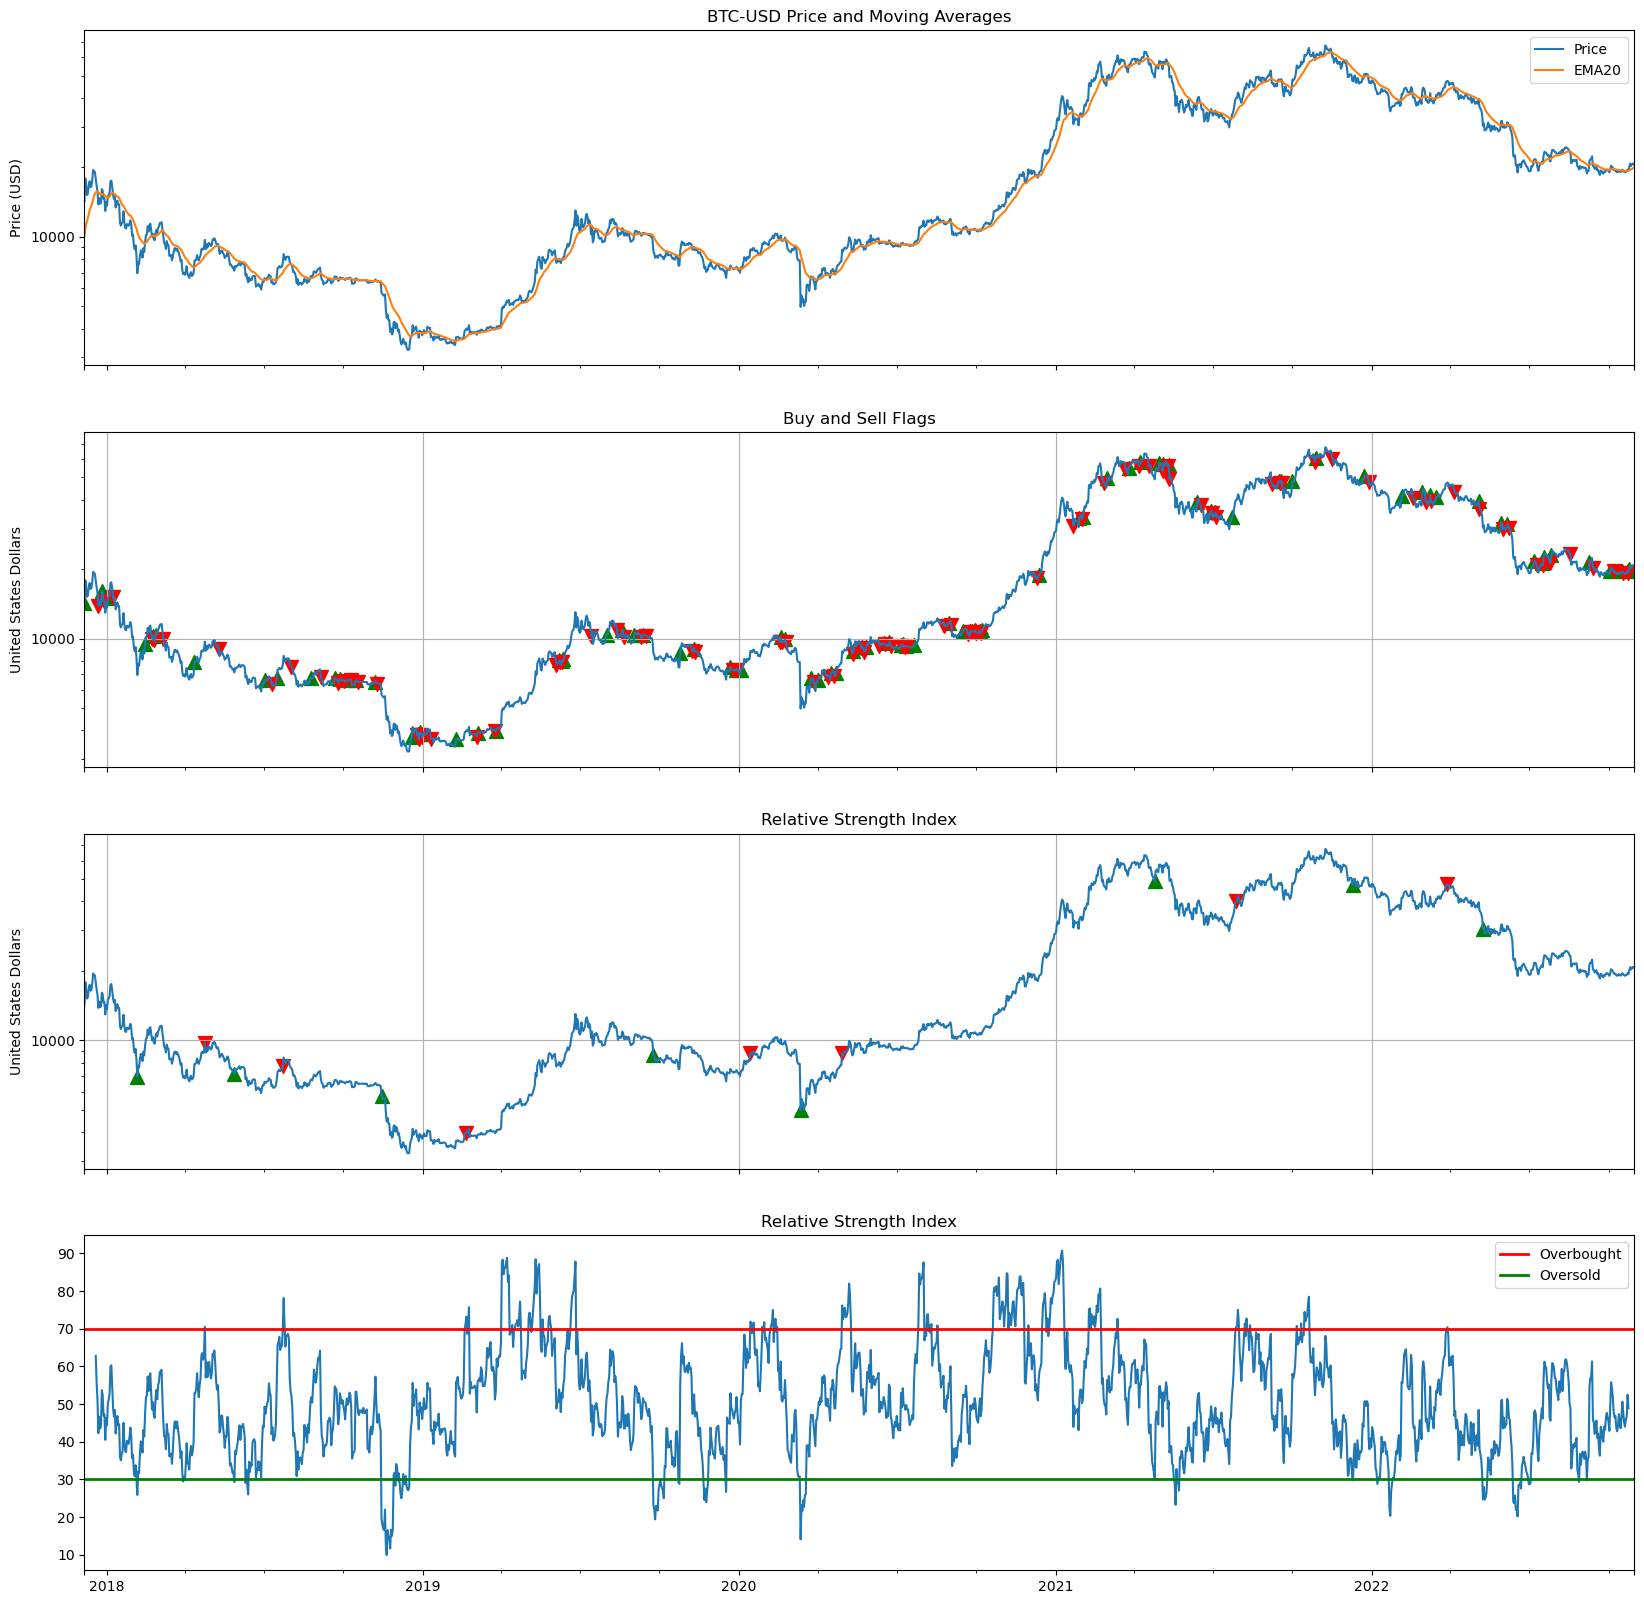

In [54]:
# Create a figure with 3 subplots and corresponding axes
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)

print(fig)
print(axes)

# set figure size (if you want different sizes)
fig.set_figheight(20)
fig.set_figwidth(20)

# Plot the data on the first subplot (axes[0]) in log scale showing the price and the moving averages
axes[0].plot(df_historical_train.index, df_historical_train['Close'], label='Price')

# axes[0].plot(df_historical_train.index, df_historical_train['EMA3'], label='EMA3')
# axes[0].plot(df_historical_train.index, df_historical_train['EMA7'], label='EMA7')
axes[0].plot(df_historical_train.index, df_historical_train['EMA20'], label='EMA20')
axes[0].set_yscale('log')
axes[0].set_title('BTC-USD Price and Moving Averages')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars

# plot buy and sell flags against the price on the second subplot (axes[1])
''' The Buy and Sell values were actually plotted on the first graph but since they are just points we couldn't see them'''
''' If we plot them with markers we can see them easily'''
df_historical_train['Close'].plot(ax=axes[1], grid = True)  # Plot the data on the second subplot
axes[1].scatter(df_historical_train[df_historical_train['EMA_BuySellFlag'] == 1].index, df_historical_train['Close'][df_historical_train['EMA_BuySellFlag'] == 1], marker = '^', color = 'green', s = 100, label = 'Buy')
axes[1].scatter(df_historical_train[df_historical_train['EMA_BuySellFlag'] == -1].index, df_historical_train['Close'][df_historical_train['EMA_BuySellFlag'] == -1], marker = 'v', color = 'red', s = 100, label = 'Sell')
axes[1].set(title = "Buy and Sell Flags", ylabel = "United States Dollars");  # Set the title and y-axis label
axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars

# plot the RSI buy and sell signals against the price axis on the third subplot (axes[2])
df_historical_train['Close'].plot(ax=axes[2], grid = True)  # Plot the data on the third subplot
axes[2].scatter(df_historical_train[df_historical_train['RSI_BuySellFlag'] == 1].index, df_historical_train['Close'][df_historical_train['RSI_BuySellFlag'] == 1], marker = '^', color = 'green', s = 100, label = 'Buy')
axes[2].scatter(df_historical_train[df_historical_train['RSI_BuySellFlag'] == -1].index, df_historical_train['Close'][df_historical_train['RSI_BuySellFlag'] == -1], marker = 'v', color = 'red', s = 100, label = 'Sell')
axes[2].set(title = "RSI Buy and Sell Flags", ylabel = "United States Dollars");  # Set the title and y-axis label
axes[2].set_yscale('log')
axes[2].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars
axes[2].set(title = "Relative Strength Index");

# plot the relative strengh 
df_rsi_data = rsi(df_historical_train, low=30, high=70, period=14, prevent_loss = False, return_RSI_col = True);  # re-call this function since we deleted some NaN data after making the 50MA
axes[3].plot(df_rsi_data.index, df_rsi_data['RSI'], label='RSI')
overBought = axes[3].axhline(y=70, linewidth=2, color='r', label='Overbought');
overSold = axes[3].axhline(y=30, linewidth = 2, color='g', label= 'Oversold');
axes[3].legend(handles=[overBought, overSold]);
axes[3].set(title = "Relative Strength Index");


c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\ericb\anaconda3\envs\machinelearning_20220719\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


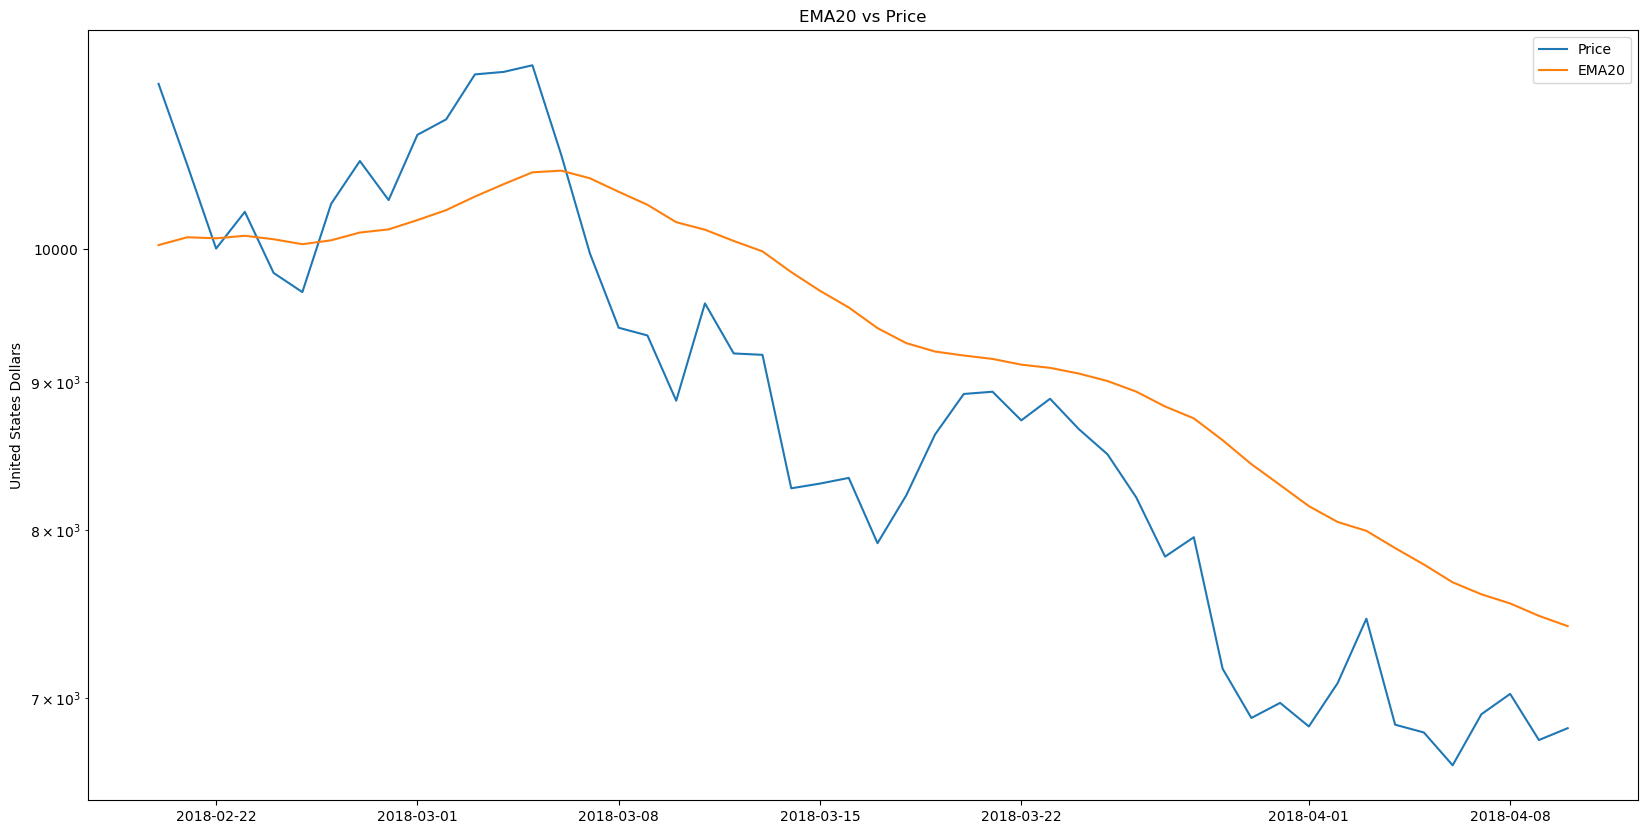

<Figure size 640x480 with 0 Axes>

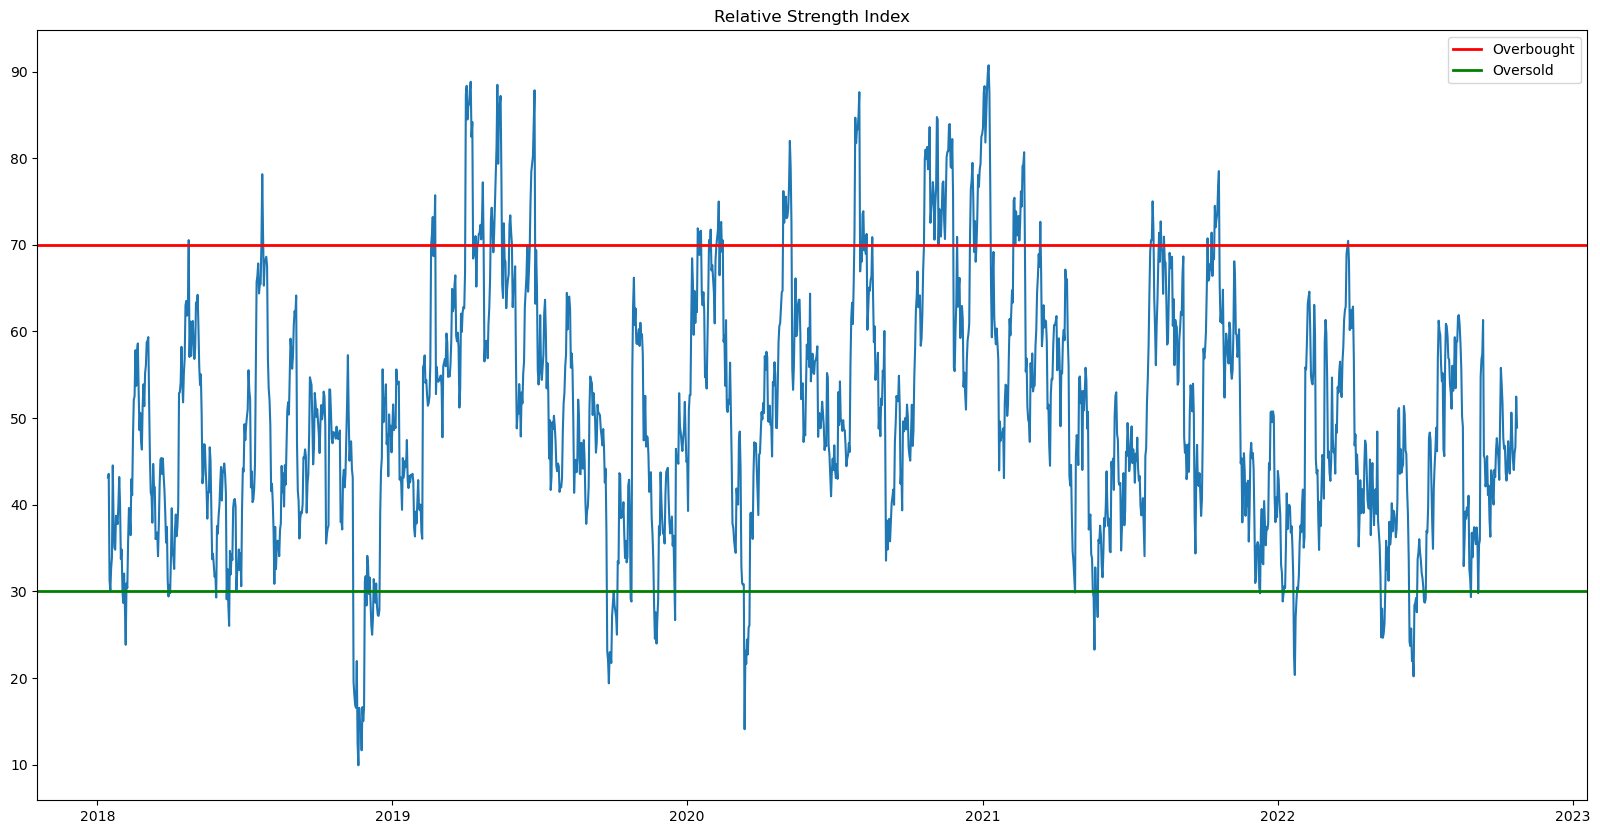

In [58]:
# plot the EMA20 vs the price for the last 20 days on a single plot
fig, ax = plt.subplots()
# set figure size
fig.set_figheight(10)
fig.set_figwidth(20)
ax.plot(df_historical_train.index[50:100], df_historical_train['Close'][50:100], label='Price')
ax.plot(df_historical_train.index[50:100], df_historical_train['EMA20'][50:100], label='EMA20')
# add the buy and sell flags
ax.set(title = "EMA20 vs Price", ylabel = "United States Dollars");  # Set the title and y-axis label
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars
ax.legend();

# plot the RSI
fig = plt.figure()
plt.figure(figsize=(20,10))
df_rsi_data = rsi(df_historical_train, low=30, high=70, period=14, prevent_loss = False, return_RSI_col = True)  # re-call this function since we deleted some NaN data after making the 50MA
plt.plot(df_rsi_data.index, df_rsi_data['RSI'], label='RSI')
overBought = plt.axhline(y=70, linewidth=2, color='r', label='Overbought')
overSold = plt.axhline(y=30, linewidth = 2, color='g', label= 'Oversold')
plt.legend(handles=[overBought, overSold])
plt.title("Relative Strength Index")
plt.savefig("RSI.png", format="png")  # save the figure
plt.show()


## Calculate the profit that would be obtained from using the EMA20 Buy/Sell Flags

Enter initial investment to see profits

In [56]:
# calculate total profit/loss for the EMA strategy assuming 1000 USD was invested
# and the price of the stock was 1000 USD at the beginning of the period

initial_investment = 1000

def cash_to_BTC(holdings_in_cash, close_price):
    return holdings_in_cash/close_price

def BTC_to_cash(holdings_in_BTC, close_price):
    return holdings_in_BTC*close_price

holdings_in_cash = initial_investment  # starting cash investment
holdings_in_BTC = 0 # current amount of BTC 

has_bought = False
has_sold = True

for i in range(len(df_historical_train)):  # Loop through the df
    if df_historical_train['EMA_BuySellFlag'].iloc[i] == 1 and has_sold == True:  # If the buy flag is 1
        #convert all holdings in cash to BTC
        print('Buy at: ', df_historical_train['Close'].iloc[i])
        print('Cash Spent: ', holdings_in_cash)
        holdings_in_BTC = cash_to_BTC(holdings_in_cash, df_historical_train['Close'].iloc[i])
        holdings_in_cash = 0
        print('BTC Recieved: ', holdings_in_BTC)
        has_bought = True
        has_sold = False
    elif df_historical_train['EMA_BuySellFlag'].iloc[i] == -1 and has_bought == True:  # If the sell flag is -1
        print('Sell at: ', df_historical_train['Close'].iloc[i])
        print('BTC Sold: ', holdings_in_BTC)
        #convert all holdings in BTC to cash
        holdings_in_cash = BTC_to_cash(holdings_in_BTC, df_historical_train['Close'].iloc[i])
        holdings_in_BTC = 0
        print('Cash Recieved: ', holdings_in_cash)
        has_bought = False
        has_sold = True 

if holdings_in_cash == 0:  # If we still have holdings in BTC
    print('Still have BTC but current profit in cash is: ', BTC_to_cash(holdings_in_BTC, df_historical_train['Close'].iloc[-1]) - initial_investment)
else:
    print('Still have cash but current profit in cash is: ', holdings_in_cash - initial_investment)

Buy at:  14982.09961
Cash Spent:  1000
BTC Recieved:  0.06674631900942221
Sell at:  15170.09961
BTC Sold:  0.06674631900942221
Cash Recieved:  1012.5483079737714
Buy at:  9494.629883
Cash Spent:  1012.5483079737714
BTC Recieved:  0.10664431583444078
Sell at:  10005.0
BTC Sold:  0.10664431583444078
Cash Recieved:  1066.97637992358
Buy at:  10301.09961
Cash Spent:  1066.97637992358
BTC Recieved:  0.10357888189798604
Sell at:  9813.070313
BTC Sold:  0.10357888189798604
Cash Recieved:  1016.4268510068599
Buy at:  10366.7002
Cash Spent:  1016.4268510068599
BTC Recieved:  0.09804728905026693
Sell at:  9965.570313
BTC Sold:  0.09804728905026693
Cash Recieved:  977.0971530294701
Buy at:  7889.25
Cash Spent:  977.0971530294701
BTC Recieved:  0.12385171632657985
Sell at:  9043.94043
BTC Sold:  0.12385171632657985
Cash Recieved:  1120.1075446108466
Buy at:  6614.180176
Cash Spent:  1120.1075446108466
BTC Recieved:  0.16934941516640756
Sell at:  6329.950195
BTC Sold:  0.16934941516640756
Cash Reci

## Calculate profit from using RSI Buy/Sell flags

In [57]:
initial_investment = 1000

holdings_in_cash = initial_investment  # starting cash investment
holdings_in_BTC = 0 # current amount of BTC 

has_bought = False
has_sold = True

for i in range(len(df_historical_train)):  # Loop through the df
    if df_historical_train['RSI_BuySellFlag'].iloc[i] == 1 and has_sold == True:  # If the buy flag is 1
        #convert all holdings in cash to BTC
        # print('Buy at: ', df_historical_train['Close'].iloc[i])
        # print('Cash Spent: ', holdings_in_cash)
        holdings_in_BTC = cash_to_BTC(holdings_in_cash, df_historical_train['Close'].iloc[i])
        holdings_in_cash = 0
        # print('BTC Recieved: ', holdings_in_BTC)
        has_bought = True
        has_sold = False
    elif df_historical_train['RSI_BuySellFlag'].iloc[i] == -1 and has_bought == True:  # If the sell flag is -1
        # print('Sell at: ', df_historical_train['Close'].iloc[i])
        # print('BTC Sold: ', holdings_in_BTC)
        #convert all holdings in BTC to cash
        holdings_in_cash = BTC_to_cash(holdings_in_BTC, df_historical_train['Close'].iloc[i])
        holdings_in_BTC = 0
        # print('Cash Recieved: ', holdings_in_cash)
        has_bought = False
        has_sold = True
        
if holdings_in_cash == 0:  # If we still have holdings in BTC
    print('Still have BTC but current profit in cash is: ', BTC_to_cash(holdings_in_BTC, df_historical_train['Close'].iloc[-1]) - initial_investment)
else:
    print('Still have cash but current profit in cash is: ', holdings_in_cash - initial_investment)


Still have BTC but current profit in cash is:  -225.1043810530391
